# Phân tích dữ liệu về giá nhà ở Ấn Độ


## Tổng quan về tập dữ liệu 
https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data

BHK: Số lượng phòng ngủ(Bedrooms), sảnh(Hall), phòng bếp (Kitchen).

Rent: Giá cho thuê của nhà/ căn hộ.

Size: Diện tích nhà/ căn hộ (feet vuông).

Floor: Tầng đang cho thuê trong tổng số các tầng (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Loại khu vực.

Area Locality: Vị trí của nhà/ căn hộ.

City: Thành phố nơi nhà/ căn hộ tọa lạc.

Furnishing Status: Tình trạng nội thất trong nhà/ căn hộ (Nội thất đầy đủ > Nội thất chưa đầy đủ > Không có nội thất).

Tenant Preferred: Đối tượng ưu tiên cho thuê.

Bathroom: Số lượng phòng tắm.

Point of Contact: Người cần liên lạc nếu cần biết thêm thông tin cho thuê nhà/ căn hộ.


# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


# Loading Data

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### Observations:
- There is no null value for any column in the dataset.

## Descriptive Statistics

In [5]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


# Data Analysis and Visualization

## Pairplot of data

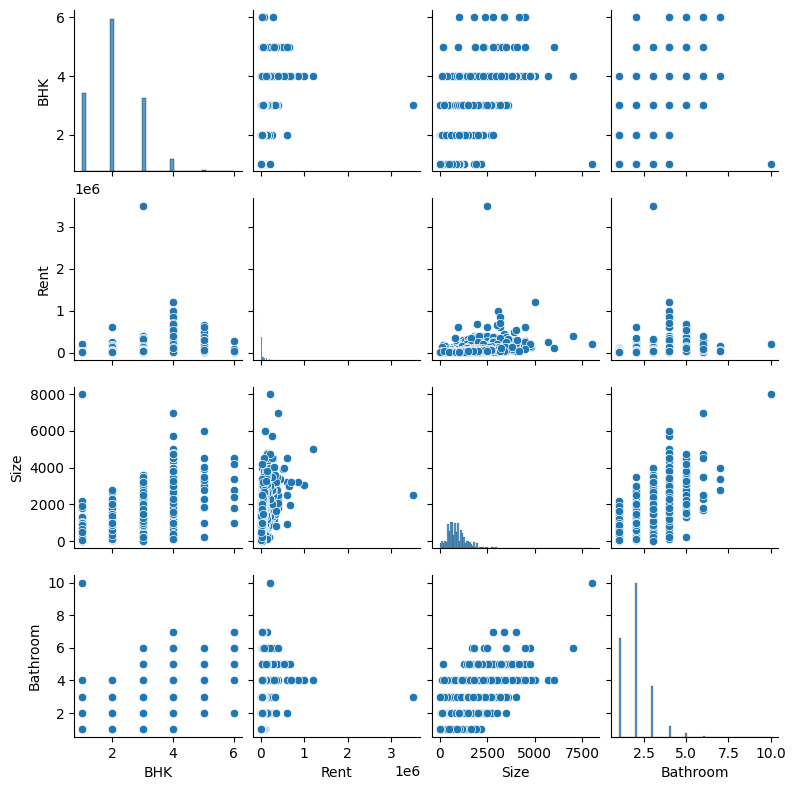

In [6]:
sns.pairplot(df,height=2)
plt.show()

## EDA

### Rent (Our Target Variable)

In [7]:
fig = px.histogram(df,x='Rent',color_discrete_sequence = px.colors.qualitative.Set3, title="Biểu đồ phân bổ giá thuê nhà")
fig.show()
fig = px.box(df, x="Rent", title='Boxplot cho giá thuê nhà')
fig.show()

#### Quan sát:
- Có một ngoại lệ nằm ngoài phạm vi là giá trị 3.5M.

#### Actions:
- Xoá bỏ giá trị ngoại biên để phân tích

### Kiểm tra vị trí ngoại biên

In [8]:
print(np.where(df['Rent']>2000000))

(array([1837], dtype=int64),)


#### Quan sát:
- Ngoại biên ở dòng 1837.

### Xoá ngoại biên

In [9]:
df.drop([1837], axis=0, inplace=True)

fig = px.box(df, x="Rent",title='Boxplot cho giá thuê nhà')
fig.show()

### BHK (số lượng phòng ngủ, phòng khách, nhà ăn)

In [10]:
df['BHK'].value_counts()

BHK
2    2265
1    1167
3    1097
4     189
5      19
6       8
Name: count, dtype: int64

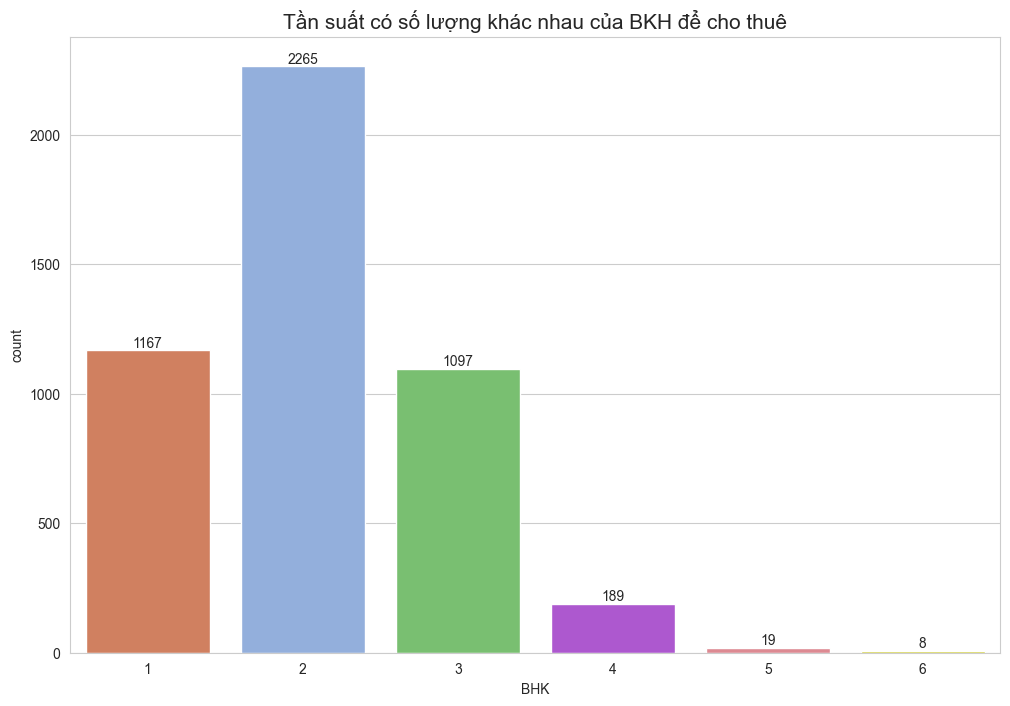

In [11]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='BHK',data=df, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tần suất có số lượng khác nhau của BKH để cho thuê',fontsize=15)
plt.show()

fig = px.pie(df, names='BHK', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Biểu đồ hình tròn của tuần suất có số lượng khác nhau của BKH')
fig.update_traces(textfont_size=15)
fig.show()

#### Quan sát:
- Hầu hết thì BKH=2 sẽ được thuê nhiều nhất.
- BKH=5 và 6 ít được thuê. 

### Bathroom

In [12]:
df['Bathroom'].value_counts()

Bathroom
2     2291
1     1474
3      748
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

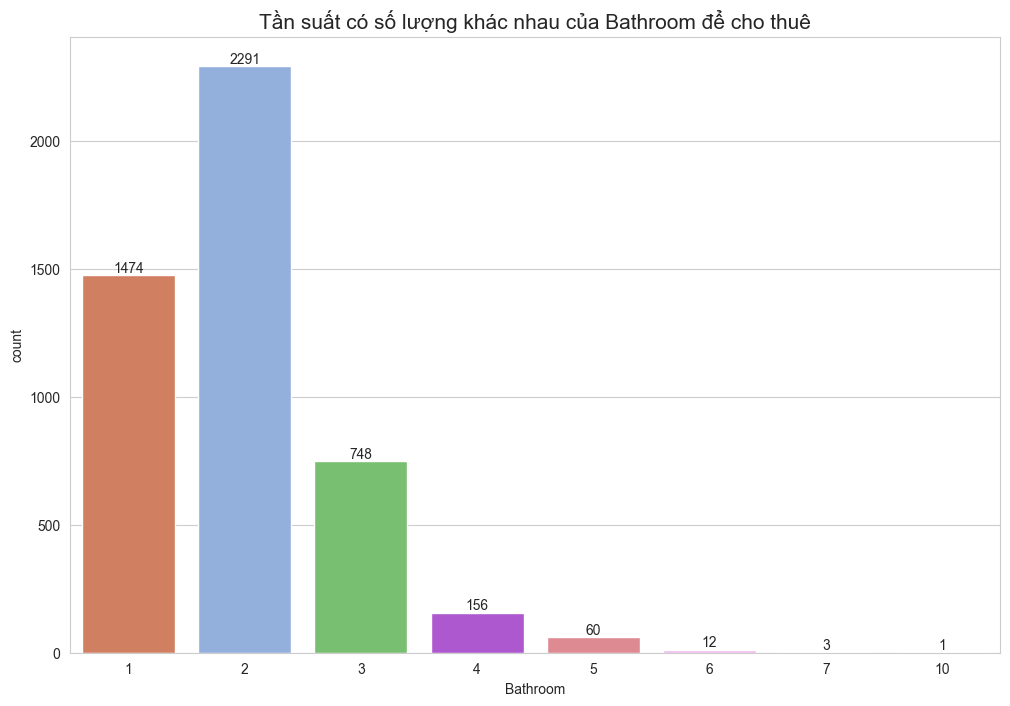

In [13]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509','#fab1f3','#86f7d7']

ax = sns.countplot(x='Bathroom',data=df, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tần suất có số lượng khác nhau của Bathroom để cho thuê',fontsize=15)
plt.show()

fig = px.pie(df, names='Bathroom', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Biểu đồ tròn tần suất có số lượng khác nhau của BKH để cho thuê')
fig.update_traces(textfont_size=15)
fig.show()

#### Quan sát:
- Nhà có số lượng phòng tắm là 2 sẽ được thuê nhiều nhất.
- Số lượng phòng tắm từ 4 trở lên sẽ ít được thuê hơn.

### City

In [14]:
df['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

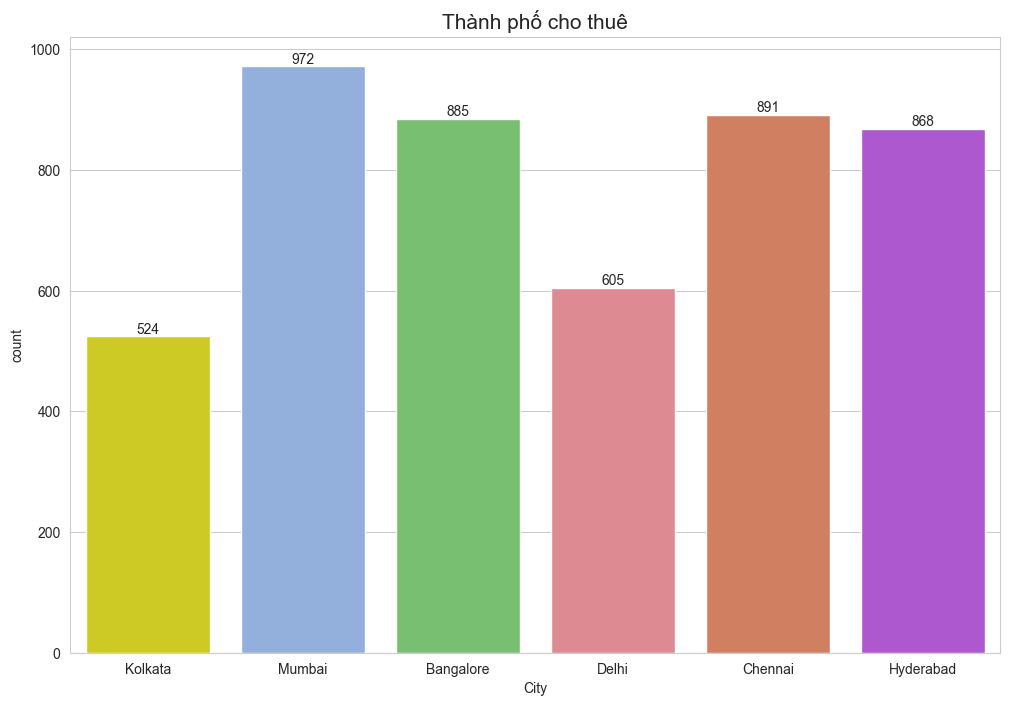

In [15]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='City',data=df, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Thành phố cho thuê',fontsize=15)
plt.show()

fig = px.pie(df, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Biểu đồ tròn thành phố cho thuê')
fig.update_traces(textfont_size=15)
fig.show()

#### Quan sát:
- Mumbai, Chennai và Hyderad có số nhà cho thuê nhiều nhất

### Area Type

In [16]:
df['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2297
Built Area        2
Name: count, dtype: int64

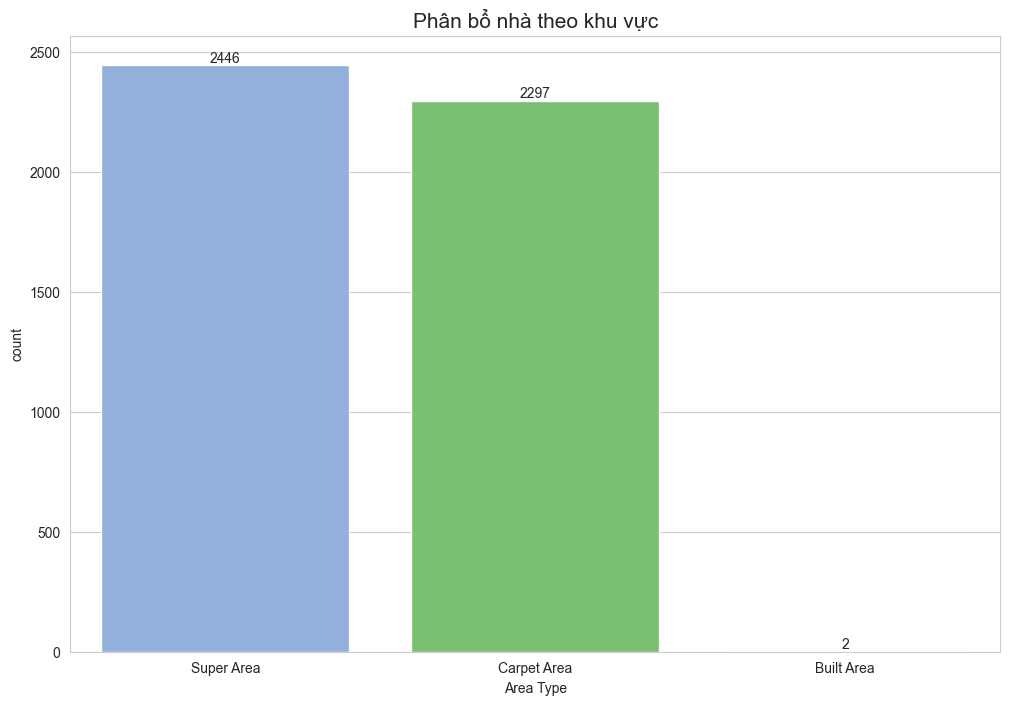

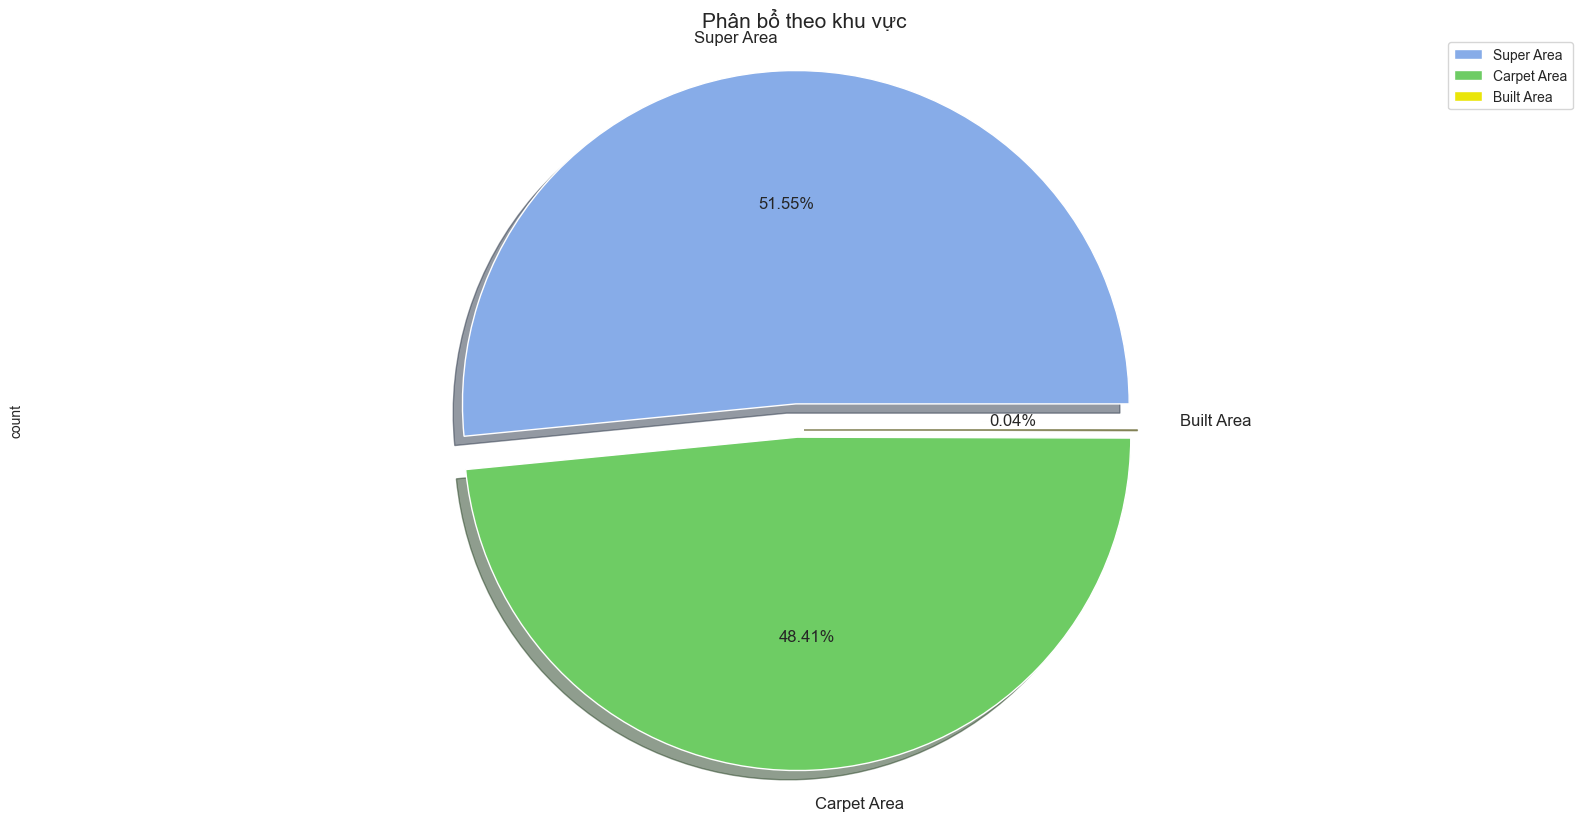

In [17]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Area Type',data=df, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Phân bổ nhà theo khu vực',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
df['Area Type'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Phân bổ theo khu vực',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()


### Point of Contact

In [18]:
df['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3216
Contact Agent      1528
Contact Builder       1
Name: count, dtype: int64

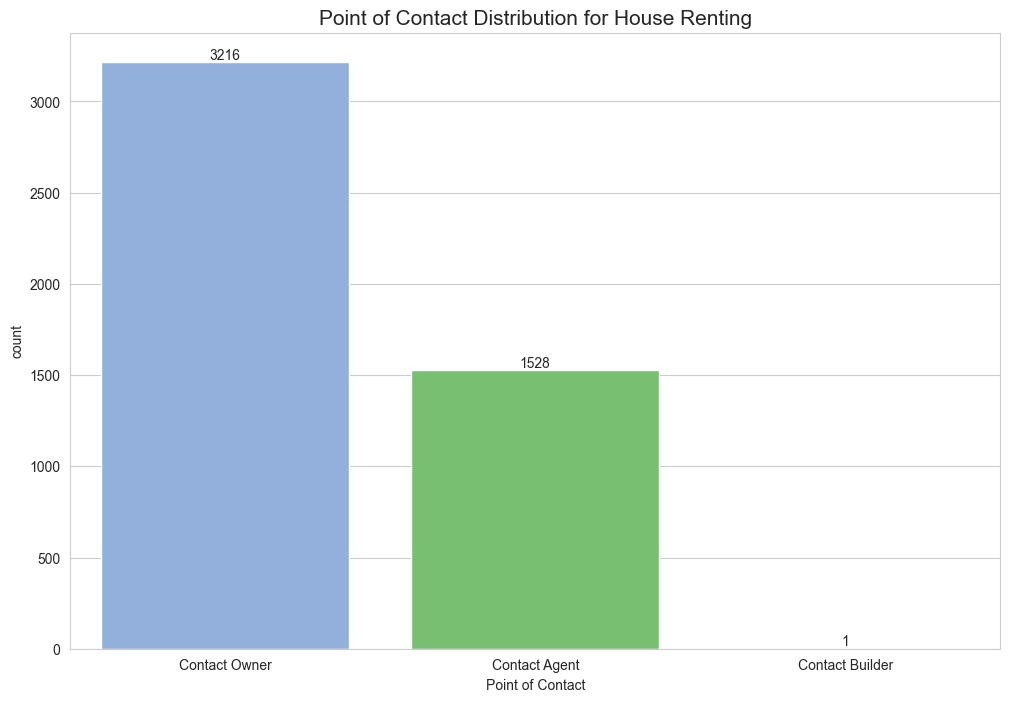

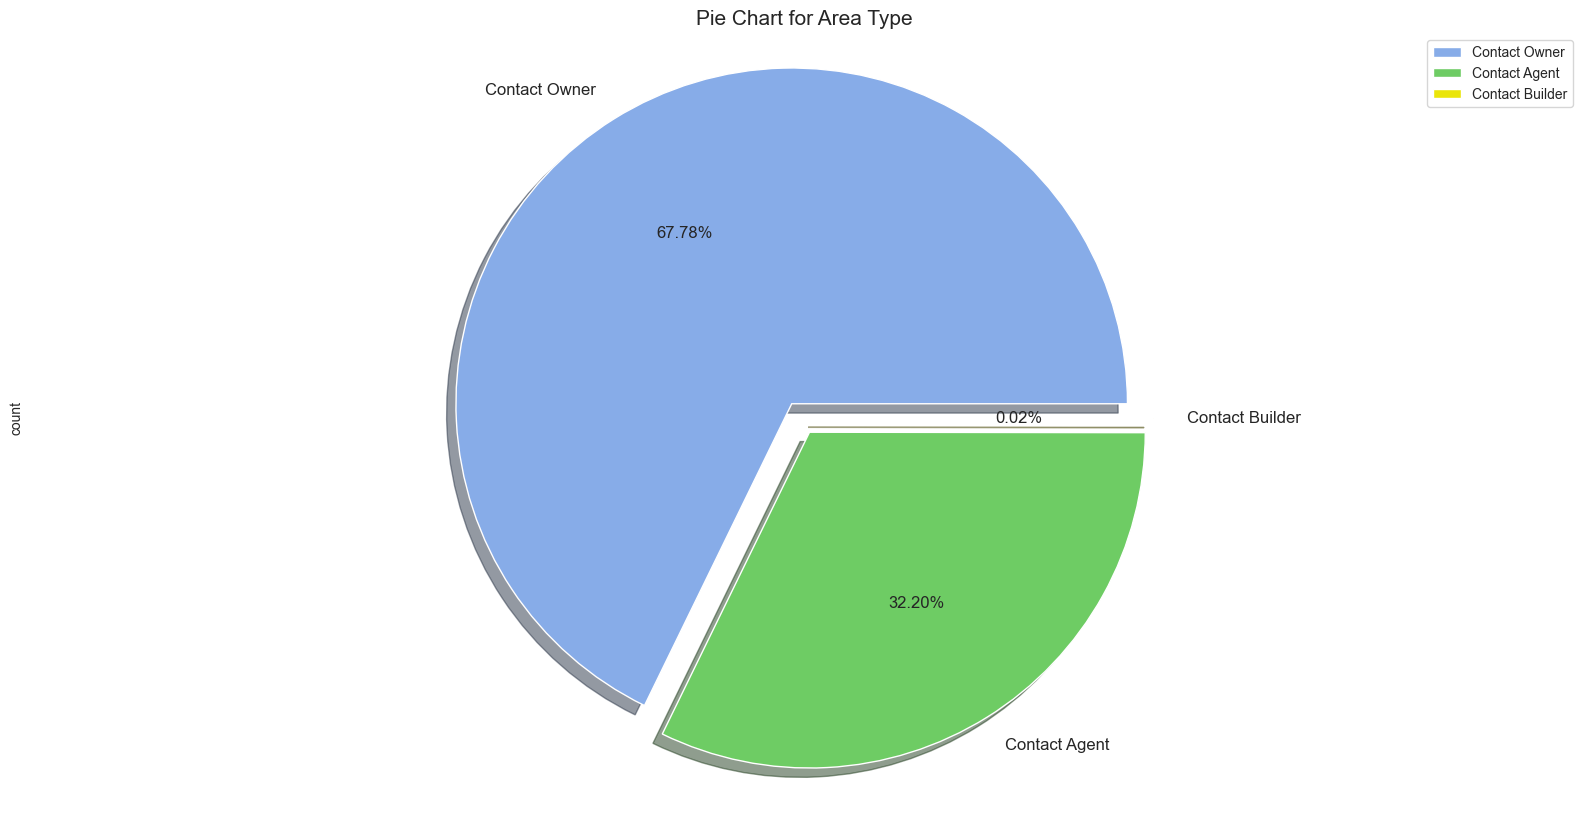

In [19]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Point of Contact',data=df, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Point of Contact Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
df['Point of Contact'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Contact wise most have put the contact of owner only, as it directly more helps with negotiation and verification.

### Tenant Preferred

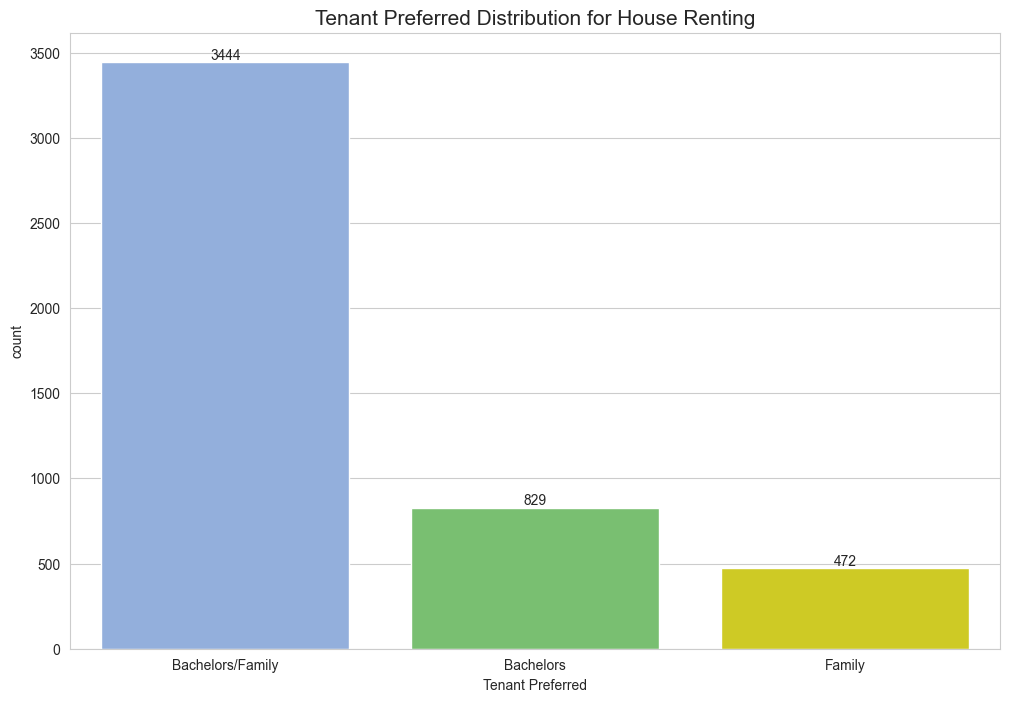

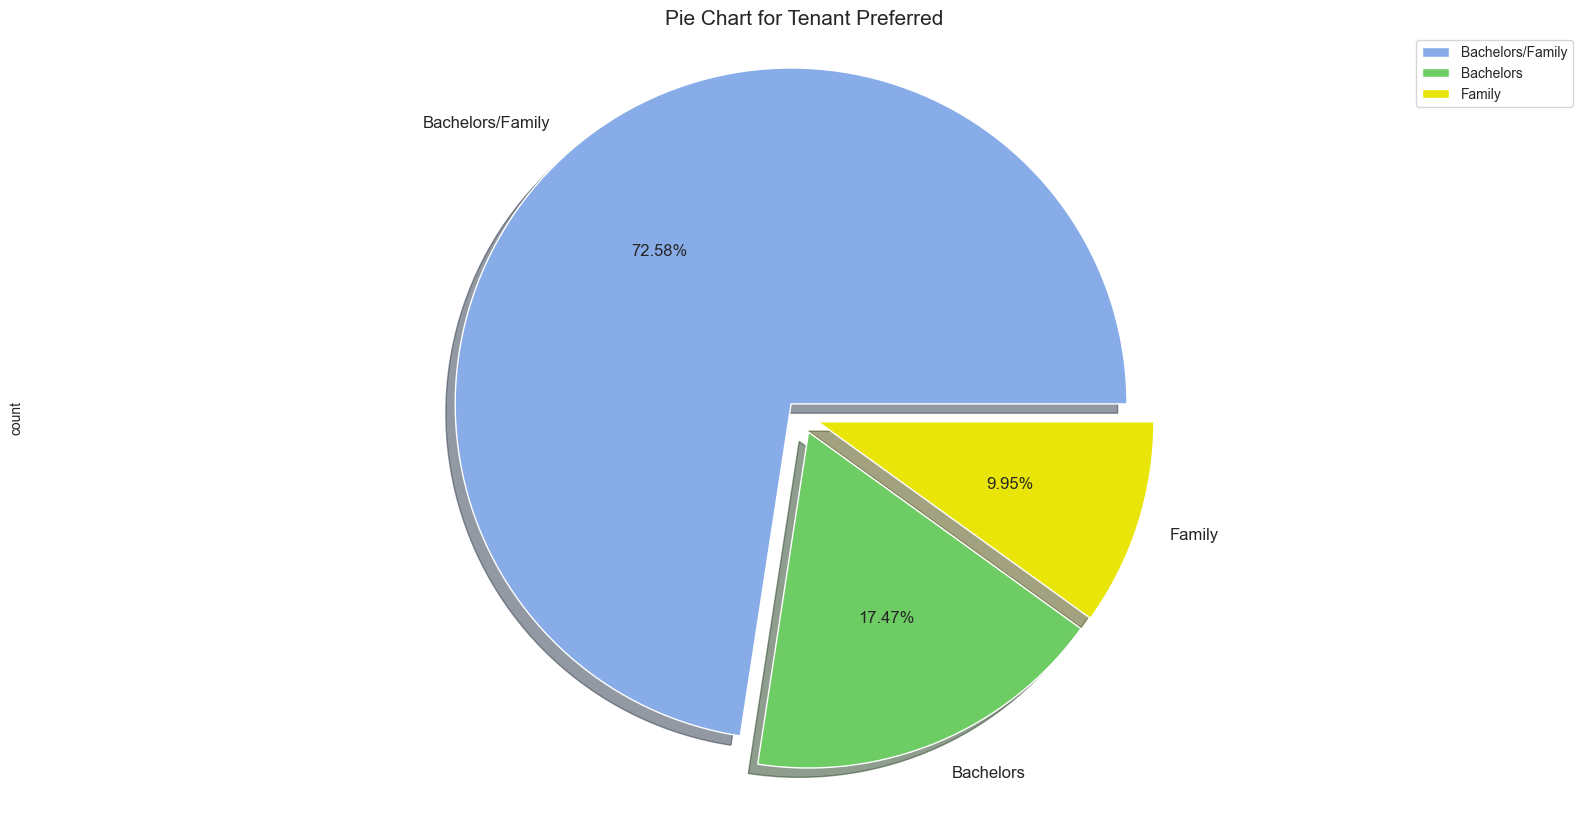

In [20]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Tenant Preferred',data=df, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tenant Preferred Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
df['Tenant Preferred'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Tenant Preferred',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- It seems most rented houses have no special category. They are okay with both Bachelors and Family.

### Furnishing Status

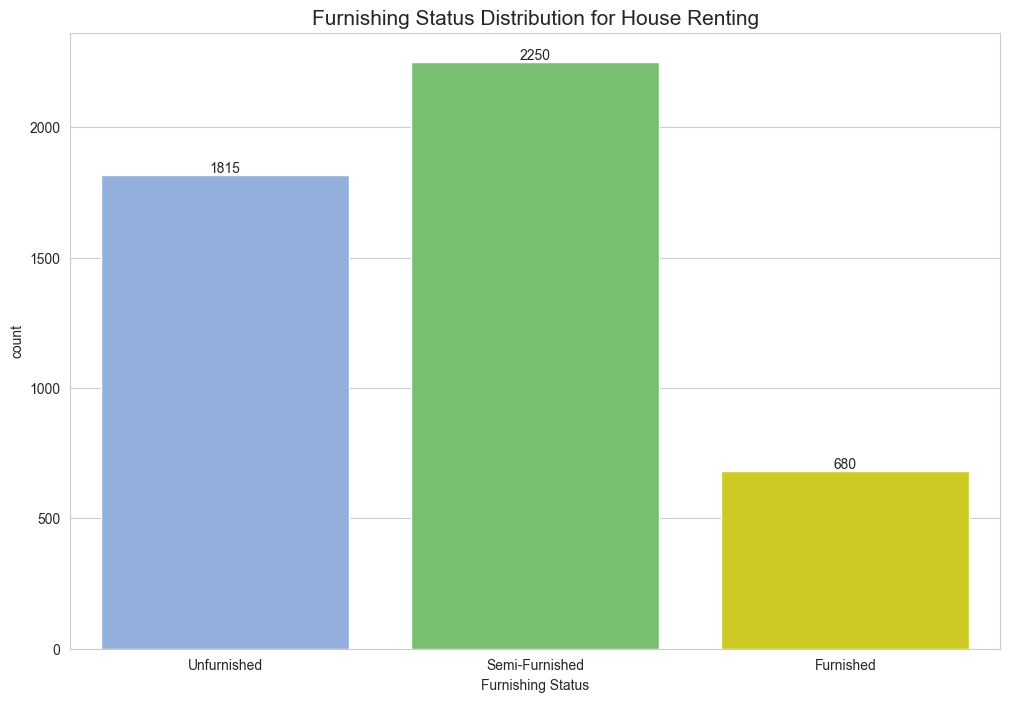

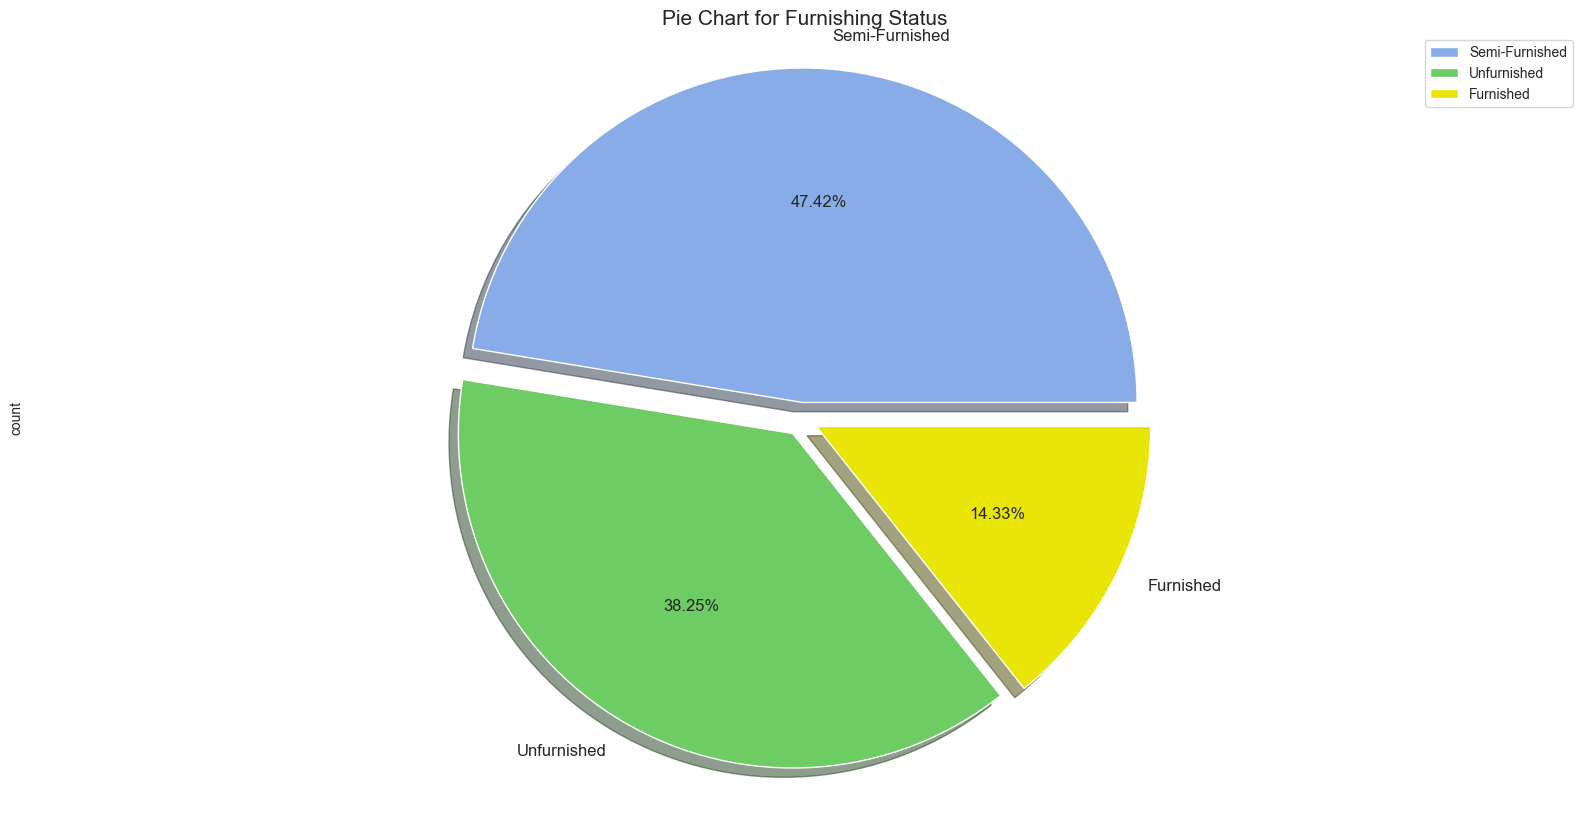

In [21]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Furnishing Status',data=df, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Furnishing Status Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
df['Furnishing Status'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Furnishing Status',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Quan sát:
- Hầu hết nhà cho thuê đều có sẵn nội thất.


## Size

In [22]:
fig = px.histogram(df, x="Size", title='Size Distribution')
fig.show()
fig = px.box(df, x="Size", title='Boxplot for Size')
fig.show()

#### Quan sát:
- Căn nhà nhỏ nhất được thuê là 10 sq. feet.
- Căn nhà to nhất là 8000 sq. feet.
- Size trung bình một căn nhà là 850 sq. feet.

### Phân phối giữa BHK và Rent

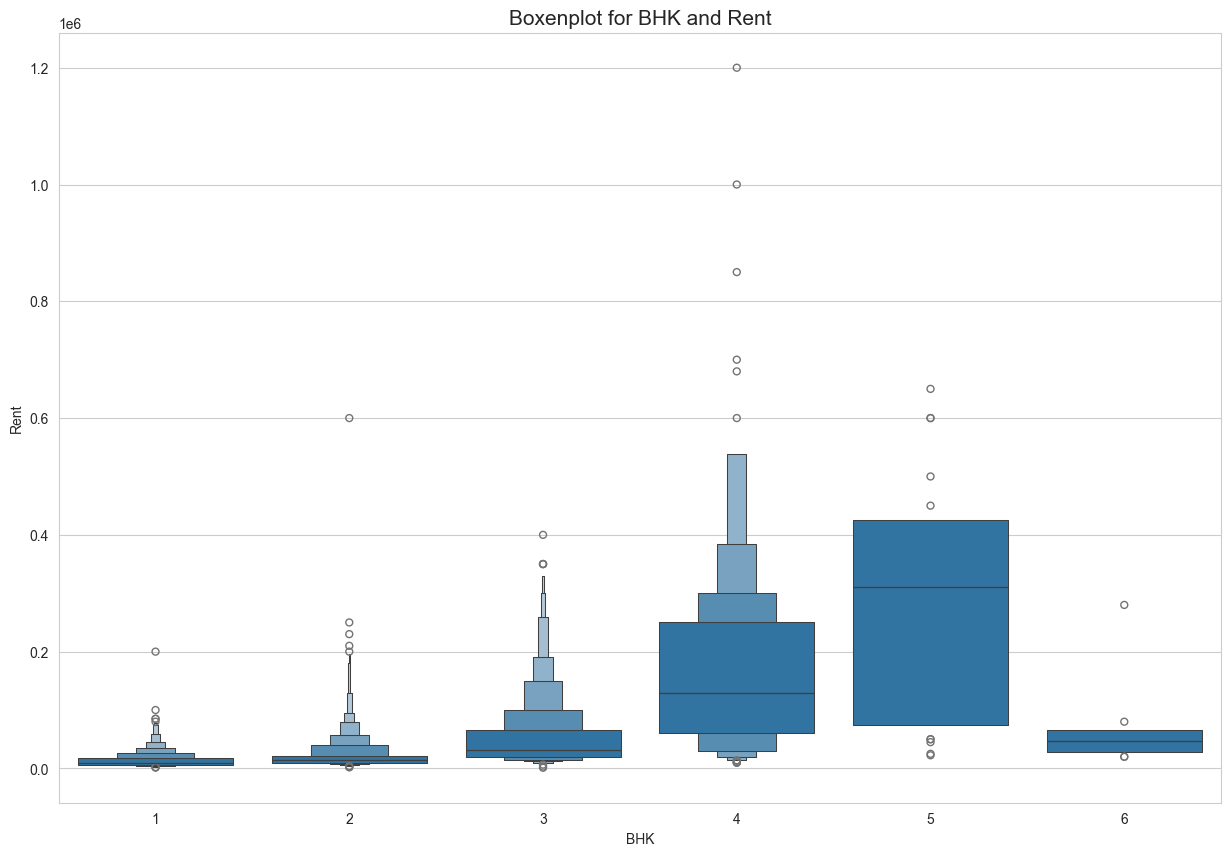

In [23]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="BHK", y='Rent',data=df)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

#### Quan sát:
- Giá thuê nhà sau đó tăng lên cùng với sự gia tăng của BHK.
- Đối với 6 BHK, mọi thứ dường như không khả thi và nhu cầu về chúng ít hơn nên tiền thuê nhà cũng rất ít.

### Bathroom and Rent distribution

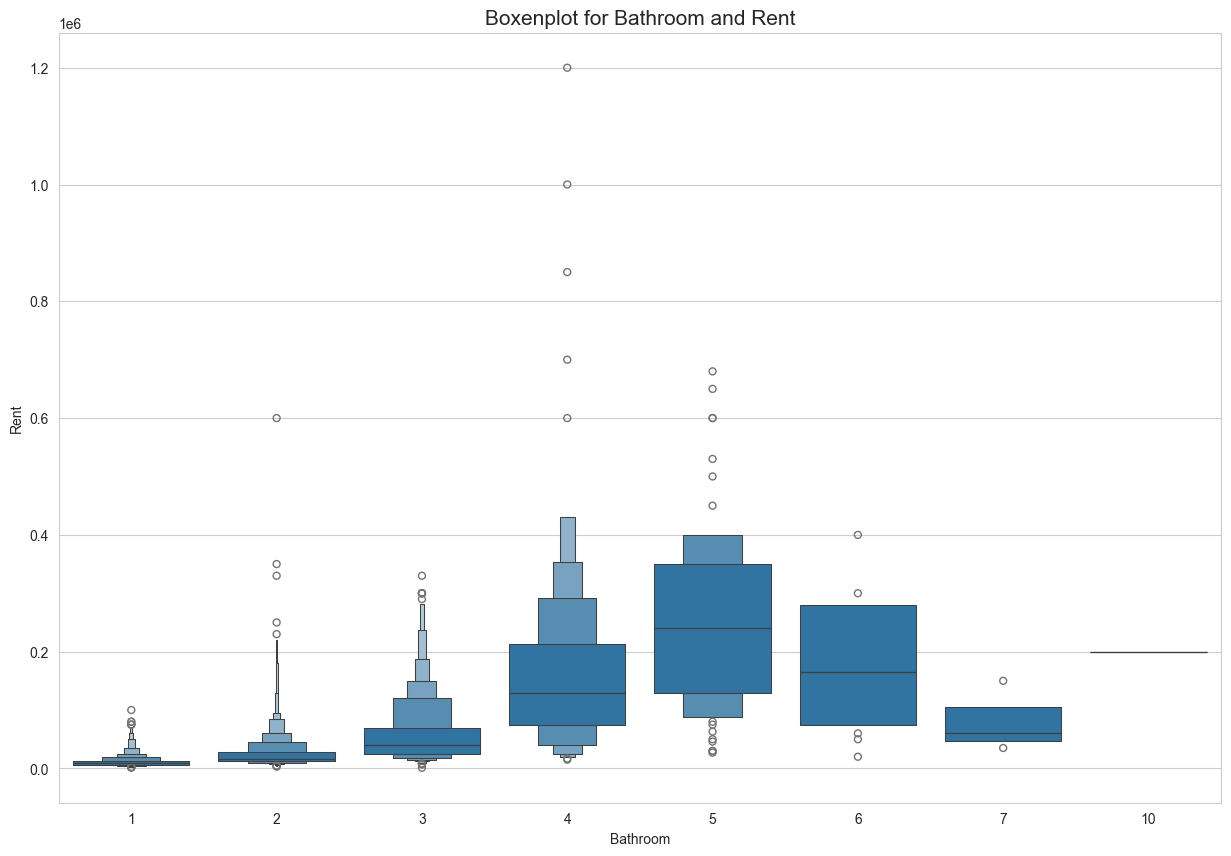

In [24]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Bathroom", y='Rent',data=df)
plt.title('Boxenplot for Bathroom and Rent',fontsize=15)
plt.show()

#### Quan sát:
- Giá thuê nhà ngày càng tăng khi số phòng tắm trong nhà tăng.
- Nhưng việc có hơn 4-5 phòng tắm trong một ngôi nhà có vẻ không khả thi và không khả thi nên nhu cầu sử dụng ít hơn và đó là lý do tại sao tiền thuê nhà cũng ít hơn.

### Area Type and Rent Distribution

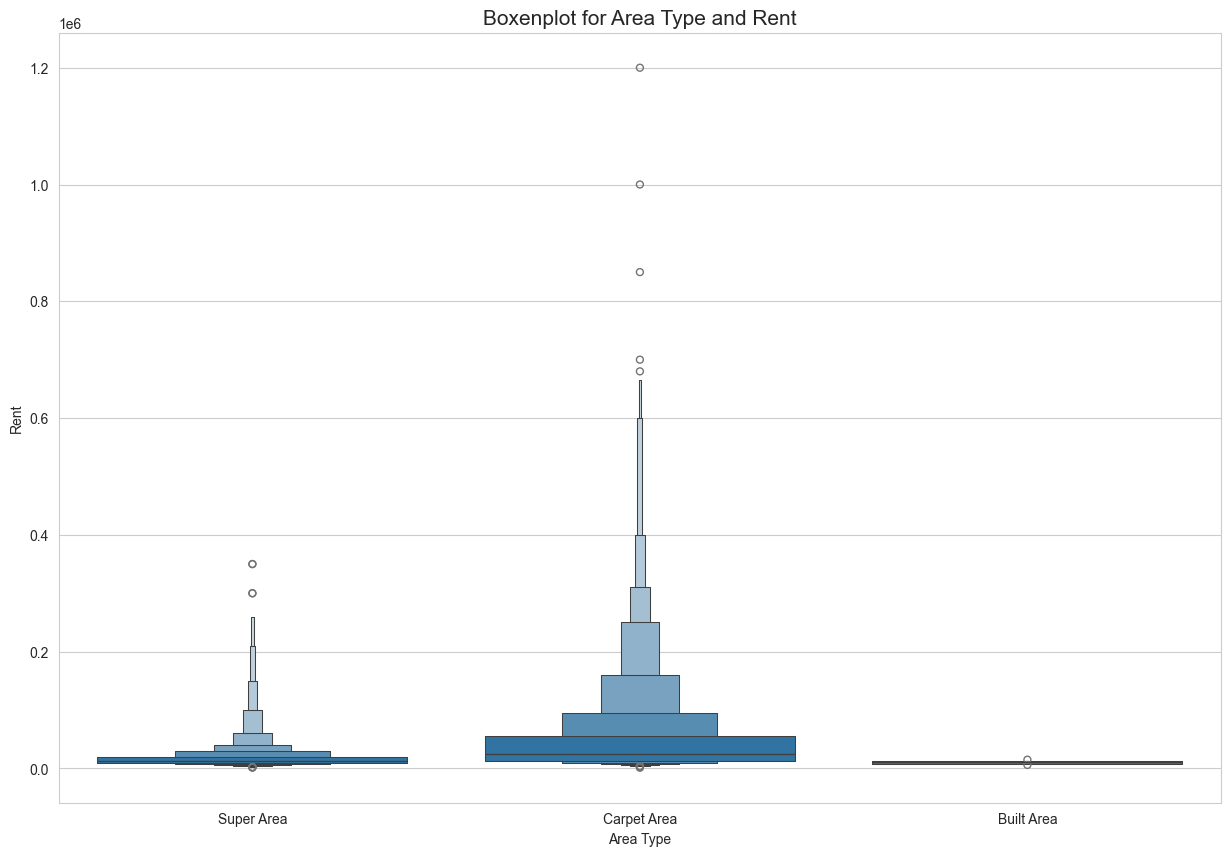

In [25]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Area Type", y='Rent',data=df)
plt.title('Boxenplot for Area Type and Rent',fontsize=15)
plt.show()

#### Quan sát:
- Những ngôi nhà có Diện tích Thảm có nhiều tiền thuê hơn so với Siêu Diện tích
- Khu vực xây dựng có nhu cầu ít hơn nên giá thuê được giữ ít hơn

### City and Rent Distribution

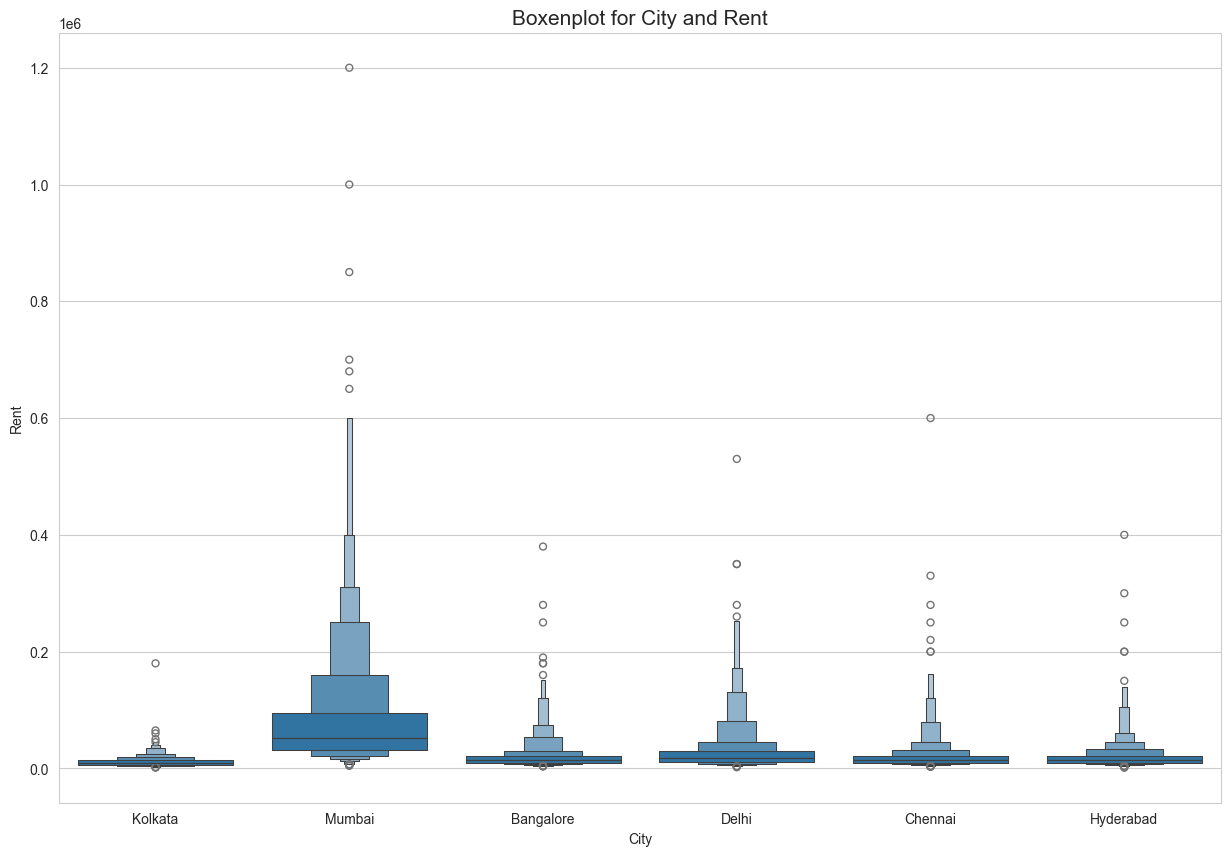

In [26]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="City", y='Rent',data=df)
plt.title('Boxenplot for City and Rent',fontsize=15)
plt.show()

#### Quan sát:
- Có vẻ như Mumbai đang có quá nhiều nhu cầu về nhà ở nên giá thuê cũng rất cao. Tỷ lệ nhập cư của các công ty việc làm đến Mumbai rất cao. Đây có thể là một trong những lý do khiến nhu cầu thuê nhà tăng lên
- Tất cả các thành phố khác ngoại trừ Kolkata đều có mức giá thuê tương đương. 
- Kolkata không phát triển nhiều về lĩnh vực công việc và lối sống so với các thành phố khác. Hơn nữa nó cũng kém phát triển hơn so với họ. Vì vậy, nhu cầu ở đó ít hơn, do đó tiền thuê nhà cũng ít hơn.

### Furnishing Status and Rent Distribution

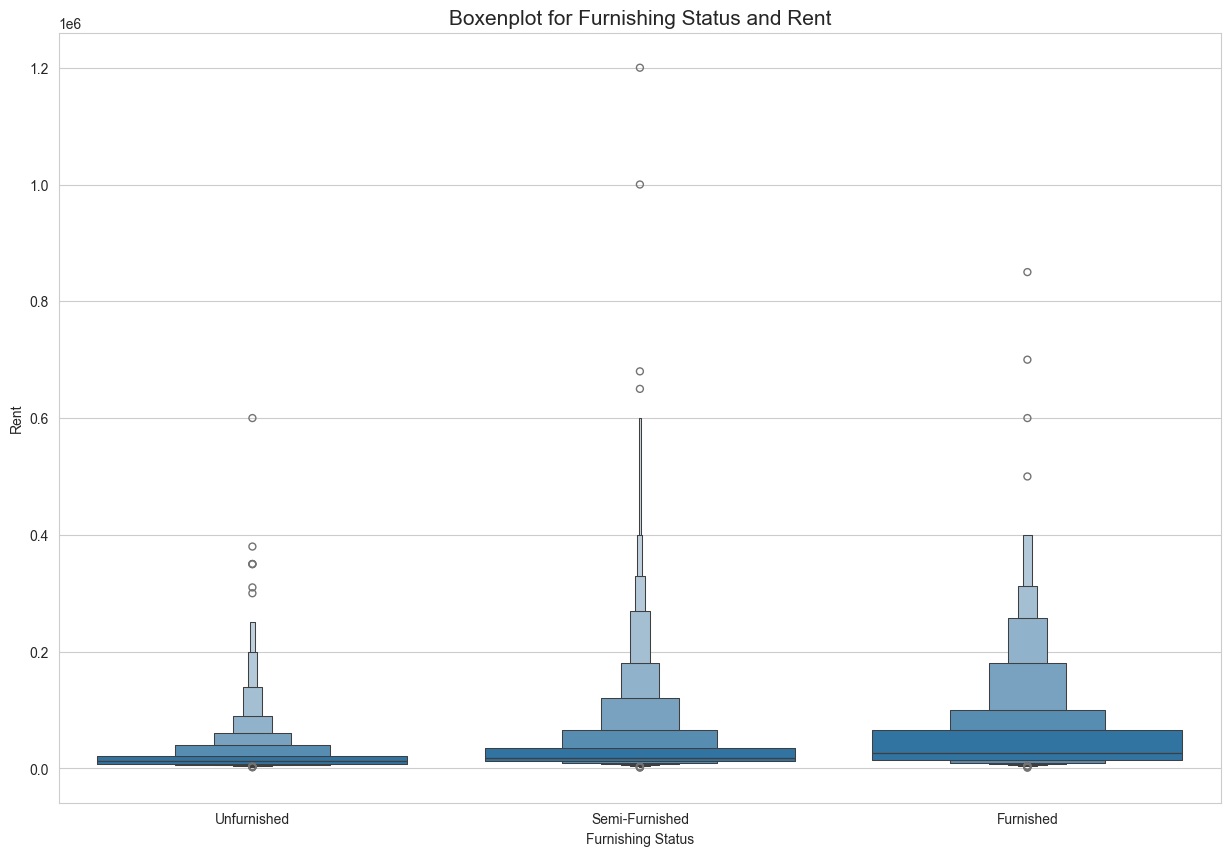

In [27]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Furnishing Status", y='Rent',data=df)
plt.title('Boxenplot for Furnishing Status and Rent',fontsize=15)
plt.show()

#### Quan sát:
- Nhà cho thuê không nội thất đang có giá thuê thấp hơn so với những căn khác.

### Tenant Preferred and Rent Distribution

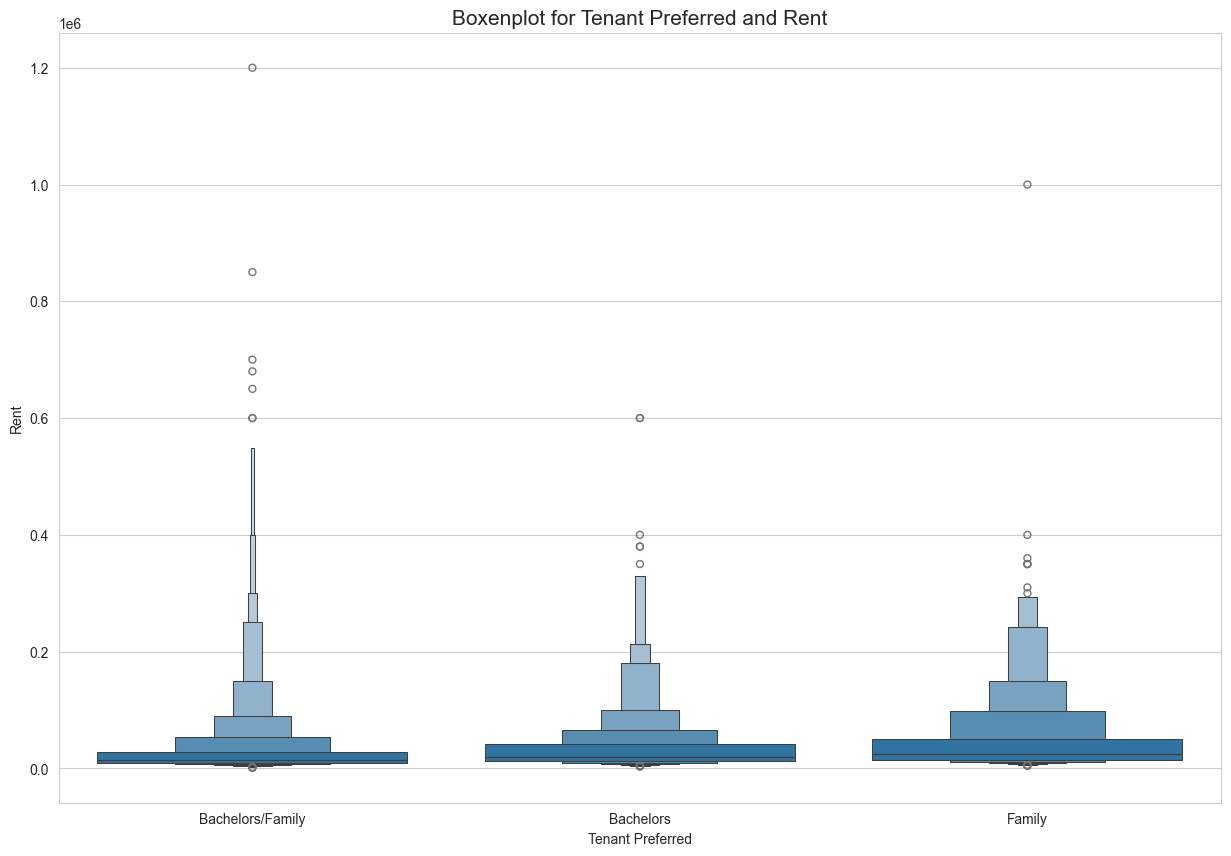

In [28]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Tenant Preferred", y='Rent',data=df)
plt.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
plt.show()

#### Quan sát:
- Những ngôi nhà được thuê không có điều kiện thuê nhà đang có giá thuê cao hơn một chút so với những ngôi nhà khác.

### Point of Contact and Rent Distribution

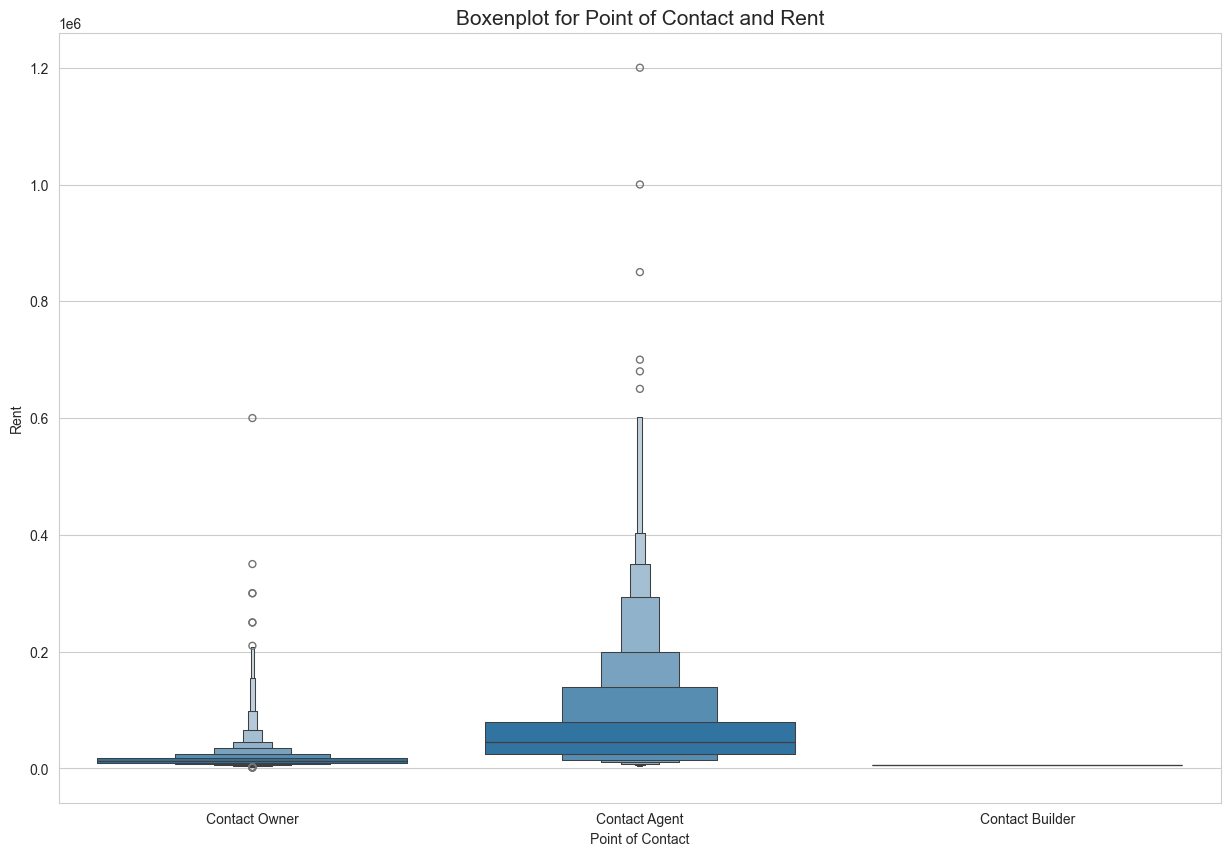

In [29]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Point of Contact", y='Rent',data=df)
plt.title('Boxenplot for Point of Contact and Rent',fontsize=15)
plt.show()

#### Quan sát:
- Vì việc có một đại lý liên hệ để giúp bạn thuê một căn nhà cũng liên quan đến việc trả tiền cho anh ấy/cô ấy. Vì vậy, đây có thể là một trong những lý do khiến giá thuê điểm liên hệ của Contact Agent hơi cao để bù đắp cho điều đó.
- Contact Builder giá sẽ thấp hơn.

### Sunburst Chart

In [30]:
fig = px.sunburst(df, path=['City','Area Type', 'Furnishing Status', 'Tenant Preferred'], width=900,
    height=900,title='Allotment of flats according to Bachelors/Family/(Bachelors/Family)',color_discrete_sequence=px.colors.cyclical.Phase)
fig.show()

In [31]:
##Xoá những cột không cần thiết
df = df.drop(['Posted On','Area Locality','Floor'],axis=1)
df.head()
dataset = df

In [32]:
df = pd.get_dummies(df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
df.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,20000,800,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,17000,1000,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,10000,800,1,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,7500,850,1,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


# Modeling

In [33]:
X = df.drop('Rent',axis=1)
y = df['Rent']

## Chia dữ liệu thành các tập train và test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

## Scaling the data

In [35]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

# HỒI QUY

## Linear Regression



In [36]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

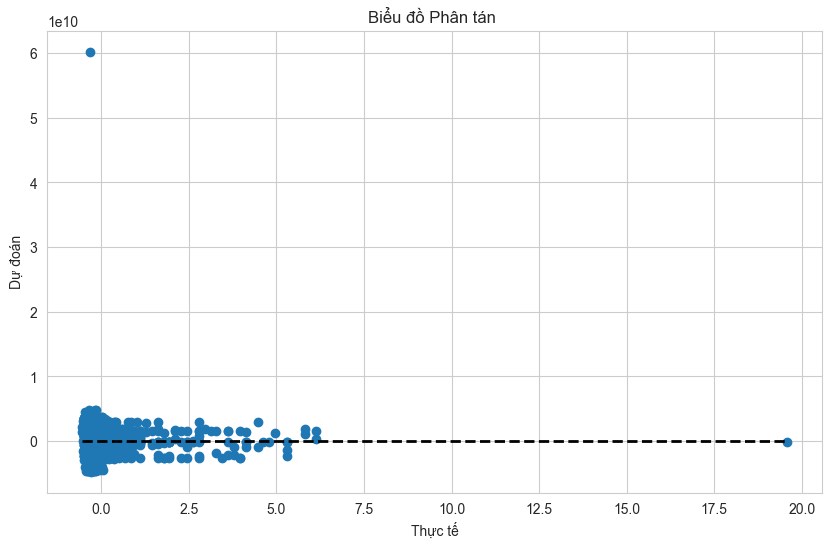

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lm_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('Biểu đồ Phân tán ')
plt.show()

In [38]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 1337142592.7346268
MSE: 5.233986337801984e+18
RMSE: 2287790711.1014295


## Decision Tree



In [39]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

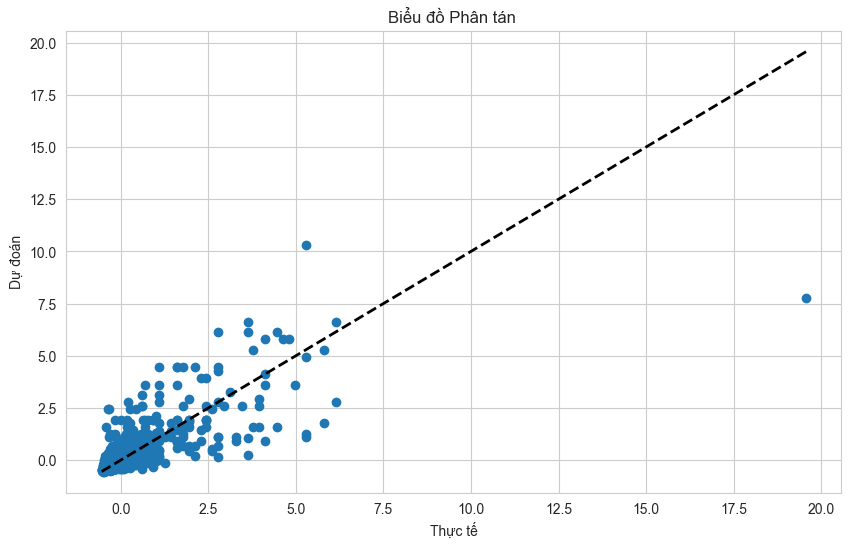

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('Biểu đồ Phân tán ')
plt.show()

In [41]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.25767891524169967
MSE: 0.4224998679675354
RMSE: 0.6499998984365578


## Random Forest



In [42]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

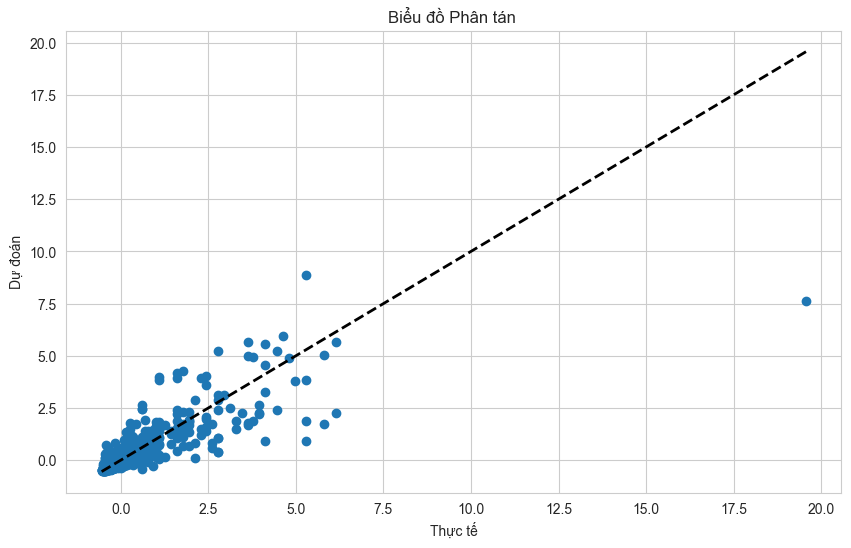

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('Biểu đồ Phân tán ')
plt.show()

In [44]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.20866670940081686
MSE: 0.30984140677441124
RMSE: 0.5566339971421178


## Phân Cụm 
Ở đây thì nhóm xài KMeans để thể hiện sự phân cụm 

In [45]:
from sklearn.cluster import KMeans
import pandas as pd


In [46]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [47]:
# In ra các trung tâm của các cụm
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[ 2.00179131e+00  2.27404657e+04  8.98589118e+02  1.85647112e+00
   4.47828034e-04  4.59471563e-01  5.40080609e-01  1.93909539e-01
   1.95924765e-01  1.30317958e-01  1.91222571e-01  1.17107031e-01
   1.71518137e-01  1.33900582e-01  4.69547694e-01  3.96551724e-01
   1.74652933e-01  7.31751008e-01  9.35960591e-02  2.84594716e-01
   2.23914017e-04  7.15181370e-01]
 [ 4.15000000e+00  5.88000000e+05  3.10940000e+03  4.50000000e+00
  -5.42101086e-20  1.00000000e+00 -1.11022302e-16  0.00000000e+00
   5.00000000e-02  5.00000000e-02  5.00000000e-02  0.00000000e+00
   8.50000000e-01  3.50000000e-01  6.00000000e-01  5.00000000e-02
   1.50000000e-01  7.50000000e-01  1.00000000e-01  9.50000000e-01
  -2.71050543e-20  5.00000000e-02]
 [ 3.33590734e+00  1.90193050e+05  1.98426255e+03  3.65250965e+00
  -2.71050543e-19  8.68725869e-01  1.31274131e-01  7.33590734e-02
   5.79150579e-02  8.49420849e-02  5.01930502e-02  3.86100386e-03
   7.29729730e-01  2.89575290e-01  5.44401544e-01  1.6

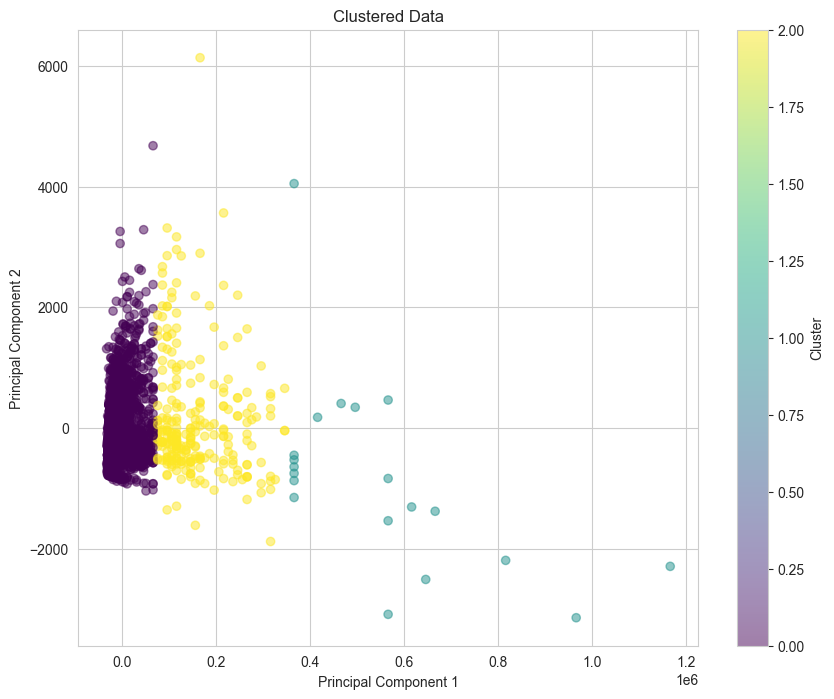

In [48]:
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu xuống 2 chiều bằng phương pháp PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)

# Trực quan hóa dữ liệu gom cụm bằng scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data')
plt.colorbar(label='Cluster')
plt.show()


In [49]:
dataset['Size'] = pd.cut(dataset['Size'], bins=[0, 700, 1000, 1500], labels=['Small', 'Medium', 'Large'])
dataset['Rent'] = pd.cut(dataset['Rent'], bins=[0, 15336, 200000], labels=['Low','High'])

In [50]:
bathroom_mapping = {
    1: '1r',
    2: '2r',
    3: '3r',
    4: '4r',
    5: '5r',
    6: '6r'
}

# Ánh xạ giá trị trong cột 'Bathroom' sử dụng từ điển ánh xạ
dataset['Bathroom'] = dataset['Bathroom'].map(bathroom_mapping)

In [51]:
dataset.head(10)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,Low,Large,Super Area,Kolkata,Unfurnished,Bachelors/Family,2r,Contact Owner
1,2,High,Medium,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1r,Contact Owner
2,2,High,Medium,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1r,Contact Owner
3,2,Low,Medium,Super Area,Kolkata,Unfurnished,Bachelors/Family,1r,Contact Owner
4,2,Low,Medium,Carpet Area,Kolkata,Unfurnished,Bachelors,1r,Contact Owner
5,2,Low,Small,Super Area,Kolkata,Unfurnished,Bachelors/Family,2r,Contact Owner
6,2,Low,Small,Super Area,Kolkata,Unfurnished,Bachelors,2r,Contact Agent
7,1,Low,Small,Super Area,Kolkata,Unfurnished,Bachelors,1r,Contact Agent
8,2,High,Medium,Carpet Area,Kolkata,Unfurnished,Bachelors,2r,Contact Agent
9,2,Low,Medium,Carpet Area,Kolkata,Semi-Furnished,Bachelors/Family,2r,Contact Owner


In [52]:
dataset.drop(['Point of Contact'], axis=1, inplace=True)

In [53]:
rent_column = dataset.pop('Rent')

In [54]:
dataset['Rent'] = rent_column

In [55]:
transactions = dataset.astype(str).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [56]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)


In [57]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [58]:
filtered_low_rules = rules[
    (rules['consequents'].apply(lambda x: set(x) == {'Low'}))&
    (rules['antecedents'].apply(lambda x: len(x) == 7))
    #&(rules['lift'] > 1.0)
]
with open('association_rules_low.txt', 'w') as low_file:
    rule_number = 1
    for index, row in filtered_low_rules.iterrows():
        low_file.write(f"{rule_number}. {row['antecedents']} => {row['consequents']}\n")
        rule_number += 1

In [59]:
#filtered_high_rules = rules[rules['consequents'].apply(lambda x: set(x) == {'High'})]
filtered_high_rules = rules[
    (rules['consequents'].apply(lambda x: set(x) == {'High'}))&
    (rules['antecedents'].apply(lambda x: len(x) == 7))
    #&(rules['lift'] > 1.0)
]
with open('association_rules_high.txt', 'w') as high_file:
    rule_number = 1
    for index, row in filtered_high_rules.iterrows():
        high_file.write(f"{rule_number}. {row['antecedents']} => {row['consequents']}\n")
        rule_number += 1